# Offline Exercise

This notebook has the questions and instructions for the offline exercise. If you haven't already, please go through the `README.md` file before you begin answering the questions here.

Make sure you do NOT commit your answers back to the repo. Instead, copy-paste this notebook together with the `touches.sqlite3` file to a separate folder in your machine, type your answers in that copied notebook, and when you're done, share the new Jupyter notebook back with the recruiter together with additional modules, graphs etc. that you may have. You would need to use the data in the `touches.sqlite3` file to answer all the questions.

In [73]:
import numpy as np
import pandas as pd
import sklearn
import sqlite3

In [74]:
conn = sqlite3.connect('touches.sqlite3')
print('Opened database successfully')
cursor = conn.execute("SELECT id, industry, size, location from companies")

Opened database successfully


In [75]:
companies = pd.read_sql("select * from companies", conn)
opportunities = pd.read_sql("select * from opportunities", conn)
persons = pd.read_sql("select * from persons", conn)
touches = pd.read_sql("select * from touches", conn)
touches['touch_scheduled_on'] = pd.to_datetime(touches.touch_scheduled_on)

In [76]:
companies.head()

,id,industry,size,location
0,1,Diversified Telecommunication Services,51-200 employees,US/Eastern
1,2,Internet Software & Services,51-200 employees,US/Mountain
2,4,Internet Software & Services,,US/Pacific
3,6,Diversified Financial Services,11-50 employees,US/Pacific
4,8,Telecommunications,,US/Eastern


In [77]:
opportunities.head()

,id,company_id,created_at,latest_stage
0,1,3633,2018-01-01 20:38:03.267059,Closed Lost
1,3,5639,2018-01-01 20:38:03.316160,Closed Lost
2,4,886,2018-01-01 20:38:03.334316,Closed Lost
3,5,588,2018-01-01 20:38:03.343280,Closed Lost
4,6,4798,2018-01-01 20:38:03.346662,Closed Lost


In [78]:
persons.head()

,id,company_id,job_seniority
0,61,1,Vice President
1,62,1,Manager
2,63,1,Executive
3,64,1,Director
4,65,1,Individual Contributor


In [79]:
touches.head()

,id,person_id,touch_scheduled_on,status,touch_type
0,166087,127117,2017-06-01,completed,Phone
1,166088,108969,2017-06-01,completed,Other
2,166089,107761,2017-06-01,completed,Phone
3,166091,77118,2017-06-01,completed,Other
4,166093,106696,2017-06-01,completed,Other


### Question 1. Find the most common industry out of all the companies that were `contacted`.

In [80]:
# step 1: filter touches table by status = completed and filtered out status that are skipped and reassigned
# step 2: inner join touches_completed table with persons table on person_id
# step 3: inner join touches_completed_person table with companies table on id


touches_completed = touches[touches['status'] == 'completed']
touches_completed_persons = pd.merge(touches_completed, persons, left_on = 'person_id', right_on ='id')
touches_completed_persons.drop(['id_x', 'id_y'], axis = 1, inplace=True)

touches_completed_persons_companies = pd.merge(touches_completed_persons, companies, left_on = 'company_id', right_on ='id')
touches_completed_persons_companies.drop(['id'], axis = 1, inplace=True)

company_industry = touches_completed_persons_companies[['company_id', 'industry']]
unique_company_industry = company_industry.drop_duplicates()

print(unique_company_industry[unique_company_industry['industry'] == 'Internet Software & Services'].shape)

answer = unique_company_industry.groupby('industry').count().sort_values('company_id').iloc[-1, :].name

print(f'The most common industry out of all the companies that were contacted: {answer}')


(3662, 2)
The most common industry out of all the companies that were contacted: Internet Software & Services


### Question 2. What is the most common touch type sellers use when they’re making their first touch with a person? What about first touch with a company?

In [81]:
touches_users_earliest_date = touches.loc[touches.groupby('person_id').touch_scheduled_on.idxmin()]
most_first_touch_with_a_person = touches_users_earliest_date.groupby('touch_type').count().loc[:, 'id'].idxmax()
print(f'Sellers use {most_first_touch_with_a_person} method when they are making their first touch with a person')

Sellers use Other method when they are making their first touch with a person


In [82]:
touches_companies_earliest_date = touches_completed_persons_companies.loc[touches_completed_persons_companies.groupby('company_id').touch_scheduled_on.idxmin()]
most_first_touch_with_a_company = touches_companies_earliest_date.groupby('touch_type').count().loc[:, 'person_id'].idxmax()
print(f'Sellers use {most_first_touch_with_a_company} method when they are making their first touch with a company')

Sellers use Other method when they are making their first touch with a company


### Question 3. Describe the distribution of the job seniorities of people that a seller will first try to contact within a company.

To answer this question, you may use visuals, graphs, bunch of scores, tables, writeups - whatever you want. We literally want you to "describe" the distribution to us in the best way you can!

(Note: this question doesn't really have one right answer. It's more about your style of communicating the results.)

job_seniority
Director                  2848
Executive                 1300
Individual Contributor    1000
Manager                   1895
Unknown                    517
Vice President            2627
Name: person_id, dtype: int64

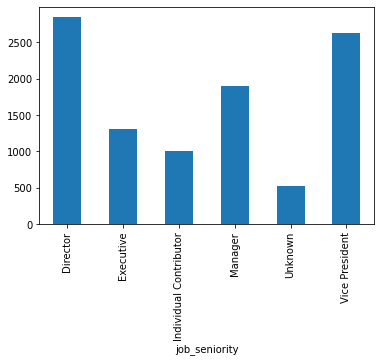

In [83]:
touches_companies_earliest_date.groupby('job_seniority').size().plot.bar()
touches_companies_earliest_date.groupby('job_seniority').count().iloc[:, 0]

### Question 4. Describe the distribution of the mixture of job seniorities of people that a seller will touch during the entire engagement with a company.
Keep in mind that you get to decide what “mixture” means, so do begin your answer by defining it - and explaining why you think this definition makes sense. Again, feel free to use whatever visuals, graphs, bunch of scores, tables, writeups etc. that you think is appropriate for this question.

(Note: this question doesn't really have one right answer. It's more about your style of communicating the results.)

## analysis steps
1.  Merged all tables together.
2.  Created a datafraframe where each row represent a single company and the number of unique people per seniority that are contacted with during the entire engaggement with a company. 
3.  Dataframe is groupby the "latest_stage" class attribute (seven groups),

In [84]:
touches_completed_persons_companies_opportunities = pd.merge(touches_completed_persons_companies, opportunities, left_on = 'company_id', right_on ='company_id')
touches_completed_persons_companies_opportunities.head(3)

,person_id,touch_scheduled_on,status,touch_type,company_id,job_seniority,industry,size,location,id,created_at,latest_stage
0,127117,2017-06-01,completed,Phone,3916,Executive,Diversified Telecommunication Services,11-50 employees,US/Eastern,5765,2018-06-19 02:06:25.865923,Disqualified
1,127117,2017-06-01,completed,Other,3916,Executive,Diversified Telecommunication Services,11-50 employees,US/Eastern,5765,2018-06-19 02:06:25.865923,Disqualified
2,127117,2017-06-02,completed,Phone,3916,Executive,Diversified Telecommunication Services,11-50 employees,US/Eastern,5765,2018-06-19 02:06:25.865923,Disqualified


In [85]:
companies_seniority = touches_completed_persons_companies_opportunities[["person_id", "company_id", "job_seniority", "industry", "size", "location", "latest_stage"]]
companies_seniority.drop_duplicates(inplace=True)
companies_seniority = companies_seniority.groupby(['company_id', 'job_seniority']).count().reset_index()
companies_seniority = companies_seniority[['company_id', 'job_seniority', 'person_id']]
companies_seniority.head(5)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,company_id,job_seniority,person_id
0,1,Director,3
1,1,Executive,1
2,1,Individual Contributor,1
3,1,Manager,2
4,1,Vice President,2


In [86]:
# Convert it to a Dataframe that each row represent a company_id
output = pd.DataFrame()

for idx, group in companies_seniority.groupby('company_id'):
    tmp_df = pd.DataFrame()
    tmp_dict= {}
    tmp = group.iloc[:, 1:]
    tmp.rename(columns={"person_id": "counts"}, inplace=True)
    for j in range(len(tmp)):
        tmp_dict[tmp.iloc[j].values[0]] = tmp.iloc[j].values[1]
    
    
    tmp2 = pd.DataFrame.from_dict(tmp_dict, orient='index').T
    tmp2['company_id'] = idx
    output = pd.concat([output, tmp2])
   

output.fillna(0, inplace=True)
output.head()

,Director,Executive,Individual Contributor,Manager,Vice President,company_id,Unknown
0,3.0,1.0,1.0,2.0,2.0,1,0.0
0,1.0,2.0,0.0,1.0,0.0,2,0.0
0,0.0,0.0,0.0,1.0,1.0,4,0.0
0,2.0,0.0,0.0,1.0,1.0,6,0.0
0,0.0,0.0,1.0,0.0,0.0,8,0.0


In [87]:
q4_tmp = touches_completed_persons_companies_opportunities[['company_id', 'industry', 'size', 'location', 'latest_stage']]
q4_tmp.drop_duplicates(inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
# Mixture of job seniorities of people that a seller will touch for a deal was successfully signed
q4 = pd.merge(q4_tmp, output, left_on = 'company_id', right_on ='company_id')
q4[q4['latest_stage'] == 'Closed Won'].mean(axis=0)

company_id                3757.775357
Director                     1.814159
Executive                    0.627638
Individual Contributor       1.181076
Manager                      1.268890
Vice President               1.353982
Unknown                      0.513274
dtype: float64

In [89]:
# Mixture of job seniorities of people that a seller will touch that in the end unsuccessfully.
q4[q4['latest_stage'] == 'Closed Lost'].mean(axis=0)

company_id                4445.536057
Director                     2.863276
Executive                    0.897457
Individual Contributor       0.972905
Manager                      1.824510
Vice President               2.254273
Unknown                      0.421842
dtype: float64

In [90]:
# Mixture of job seniorities of people that a seller will touch that in the end unsuccessfully.
q4[q4['latest_stage'] == 'Disqualified'].mean(axis=0)

company_id                4465.315276
Director                     2.408451
Executive                    0.859155
Individual Contributor       0.787649
Manager                      1.540628
Vice President               2.170098
Unknown                      0.395450
dtype: float64

In [91]:
# Mixture of job seniorities of people that a seller will touch with the latest stage that are still in progress.
q4[q4['latest_stage'] == 'Developing'].mean(axis=0)

company_id                4046.573770
Director                     1.114754
Executive                    0.573770
Individual Contributor       1.016393
Manager                      1.295082
Vice President               1.327869
Unknown                      0.393443
dtype: float64

In [92]:
# Mixture of job seniorities of people that a seller will touch that with the latest stage in SDR open stage.
q4[q4['latest_stage'] == 'SDR Open'].mean(axis=0)

company_id                3807.000000
Director                     2.292683
Executive                    0.951220
Individual Contributor       4.463415
Manager                      2.390244
Vice President               1.975610
Unknown                      1.512195
dtype: float64

In [93]:
# Mixture of job seniorities of people that a seller will touch with the latest stage in Discovery phase.
q4[q4['latest_stage'] == 'Discovery'].mean(axis=0)

company_id                5280.095890
Director                     1.863014
Executive                    0.904110
Individual Contributor       0.589041
Manager                      0.863014
Vice President               1.315068
Unknown                      0.164384
dtype: float64

In [94]:
# Mixture of job seniorities of people that a seller will touch in contract with the latest stage in negotiation phase.  
q4[q4['latest_stage'] == 'Contract Negotiation'].mean(axis=0)

company_id                4481.0
Director                     4.0
Executive                    0.0
Individual Contributor       1.0
Manager                      0.0
Vice President               0.0
Unknown                      0.0
dtype: float64

### Question 5. Build an algorithm that, when a seller is about to contact a company it never reached out to before, recommends the best/optimal mixture of job seniorities (with “mixture” as defined by you in Question 4.) they should be targeting within that company during the entire engagement.

This is the hardest question in this exercise. If you feel you have a good idea what the algorithm should look like but either feel uncomfortable coding-wise or feel pressed for time, it is perfectly OK to describe your idea in words. Be clear, explain both what it does and why you think this is the right approach.

Whether or not you go the code-route or writeup-route, be sure to explain the assumptions and choices you made, why you made them and how you would test them.

(Note: like with the previous two questions, this question doesn't really have one right answer either!)

## Unfortunately, using the features from Q4, I was not able to build a predictive model that is useful

In [95]:
q5_tmp = q4.copy()
q5 = q5_tmp[(q5_tmp['latest_stage'] == 'Closed Won') | (q5_tmp['latest_stage']=='Closed Lost') |  (q5_tmp['latest_stage']=='Disqualified')] 
q5['label'] = q5.latest_stage.map(lambda v:1 if v == 'Closed Won' else 0)
q5.head(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_id,industry,size,location,latest_stage,Director,Executive,Individual Contributor,Manager,Vice President,Unknown,label
0,3916,Diversified Telecommunication Services,11-50 employees,US/Eastern,Disqualified,1.0,1.0,1.0,2.0,1.0,0.0,0
1,3144,Internet Software & Services,201-500 employees,US/Pacific,Disqualified,3.0,2.0,1.0,6.0,5.0,2.0,0
2,3079,Internet Software & Services,51-200,US/Eastern,Closed Lost,15.0,1.0,2.0,7.0,3.0,1.0,0
3,1976,Corporate Services,201-1000,Europe/Istanbul,Closed Lost,8.0,1.0,0.0,2.0,7.0,1.0,0
4,3045,Internet Software & Services,51-200,US/Pacific,Closed Lost,15.0,1.0,0.0,4.0,5.0,1.0,0


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

X = q5.drop(['industry','company_id', 'size', 'location', 'latest_stage', 'label'], axis=1)
y = q5['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [97]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# transformer = ColumnTransformer(transformers=[('industry', OneHotEncoder(), [3])], remainder='passthrough')
# X_train = transformer.fit_transform(X_train)
# X_test = transformer.transform(X_test)
# X_train.head()

In [98]:
pipe = Pipeline([
    ('reduce_dim', 'passthrough'),
    ('classify', XGBClassifier(random_state=20,objective= 'binary:logistic'))
])

param_grid = [
    {
        'classify__eta': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        'classify__max_depth': [ 3, 4, 5, 6]
    },  
]

In [99]:
gs_xgb = GridSearchCV(estimator = pipe, cv = 2, n_jobs=-1, param_grid = param_grid, scoring = 'roc_auc')
xgb_scores = cross_val_score(gs_xgb, X_train, y_train, scoring='roc_auc', cv=5)

gs_xgb.fit(X_train, y_train)

print('The optimal eta: %.1f' %(gs_xgb.best_params_['classify__eta']))
print('The optimal max_depth: %.1f' %(gs_xgb.best_params_['classify__max_depth']))
print('XGB Train CV ROC AUC: %.3f +/- %.3f' %(np.mean(xgb_scores), np.std(xgb_scores)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The optimal eta: 0.1
The optimal max_depth: 3.0
XGB Train CV ROC AUC: 0.645 +/- 0.022


In [100]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

y_pred_xgb = gs_xgb.predict(X_train)
print('Precision Train: %.3f for XGBoost' % precision_score(y_train, y_pred_xgb))
print('Recall Train: %.3f for XGBoost' % recall_score(y_train, y_pred_xgb))
print('F1 Train: %.3f for XGBoost' % f1_score(y_train, y_pred_xgb))
print('ROC AUC Train: %.3f for XGBoost' % roc_auc_score(y_train, y_pred_xgb))
print('Confusion matrix (Train):')
print(confusion_matrix(y_train, y_pred_xgb))
                     

Precision Train: 0.732 for XGBoost
Recall Train: 0.060 for XGBoost
F1 Train: 0.112 for XGBoost
ROC AUC Train: 0.525 for XGBoost
Confusion matrix (Train):
[[2631   26]
 [1104   71]]


In [101]:
y_pred_xgb = gs_xgb.predict(X_test)
print('Precision Train: %.3f for XGBoost' % precision_score(y_test, y_pred_xgb))
print('Recall Train: %.3f for XGBoost' % recall_score(y_test, y_pred_xgb))
print('F1 Train: %.3f for XGBoost' % f1_score(y_test, y_pred_xgb))
print('ROC AUC Train: %.3f for XGBoost' % roc_auc_score(y_test, y_pred_xgb))
print('Confusion matrix (Train):')
print(confusion_matrix(y_test, y_pred_xgb))

Precision Train: 0.367 for XGBoost
Recall Train: 0.037 for XGBoost
F1 Train: 0.068 for XGBoost
ROC AUC Train: 0.504 for XGBoost
Confusion matrix (Train):
[[646  19]
 [283  11]]
